<h1>Unit 12 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>

<h2> Multivariate Linear Regression, Inference </h2>
<img src="https://drive.google.com/uc?export=view&id=1R6LP-gH70o1NB16YJ_lsNcGtkGqa7bpS">


<h3> 0.1 Class Announcements </h3>
1. Announcement 1
2. Packages
<ul>
<li> conda install -c r r-car
<li> conda install -c r r-lmtest
<li> conda install -c r r-sandwich
<li> conda install -c r r-stargazer
</ul>

<h3> 0.2 Getting to This Document</h3>

If you have not cloned the unit_9_ls repo yet then on the command line

1. git clone https://github.com/w203-summer-19/unit_12_ls.git 

2. cd unit_12_ls

3. git checkout penner_sections


If you have cloned this repo already then on the command line

1. cd unit_12_ls

2. git fetch

3. git checkout penner_sections


<h3> 1 Useful functions in R: </h3>

Code    |    Function 
--------------------------|---------------------------------------------------------------------
coefficients(fit) | Extract model coefficients
fitted(fit)       | Extract predicted values
residuals(fit)    | Extract resduals
vcovHC(fit)       | Extract heteroskedasticity-robust covariance matrix
coeftest(fit, vcov = vcovHC) | Conduct hypothesis test with heteroskedasticity-robust standard errors
confint(fit, level=0.95)| Calculate non-robust CIs for model parameters (at 95%) 

**Note:** For heteroskedasticity-robust confidence intervals, get the variance of each coefficient from vcovHC, take the square root to get the standard error, get the proper t critical values from qt, and construct manually.

<h3> 2 Variance of OLS Estimators </h3>

Recall (one of) the expression(s) for the variance of each OLS slope coefficient:

$$var(\hat{\beta_j}) = \frac{\sigma^2}{SST_j (1-R_j^2)}$$

<h4> A Crappy Analogy </h4>

Sometimes when you are (re)learning linear regression it is helpful to think in terms of analogies, so here goes... 

Imagine that you have gone to popular club late on a Friday night with two friends Alex and Bob. You find yourself a table and sit down close to the dance floor. This would be the perfect opportunity for you to try out the new shopping cart dance move you have been practicing in front of your dog all week but its been a long night and the three of you only want to talk.

Your conversation starts but you are having trouble following the conversation for two distinct reasons. 

1. You are having trouble distinguishing the voices of your friends from the overall noise in the club. 

2. The lights are flashing in such a way that the faces of your friends are in total darkness most of the time, as a result even when you can distinguish between the background club noises and your friends you are having trouble distinguishing Alex's voice from Bob's. 

The background noise in the club is analogous to the error term $u$ of the regression,

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + u $$

$X_1$ and $X_2$ are the variation of $Y$ (the sound in the club) due to Alex and Bob respectively, $u$ is the variation in your outcome $Y$ (sound in the club) which is just uninteresting noise. 

In this context regression is an attempt to distinguish the variation in $Y$ (sound in the club) due to regressors $X_1$ and $X_2$, (Alex and Bob respectively) from $u$,which is just uninteresting noise (Boots and Pants, "it's getting hot in here so ....", " Yeah, yeah, ... ", " oh my good she is such a ...."). 

Regression is also an attempt to distinguish the variation in $Y$ (sound in the club) due to $X_1$ (Alex) from the variation in $Y$ due to $X_2$ (Bob).

As a result, here we will equate the variance of the sampling distribution of $\hat{\beta}_1$ and $\hat{\beta}_2$ with how well you can distinguish the Alex and Bobs voices (respectively) from the rest of the noise of the club, meaning that as the variance decreases the better you can distinguish its source. 

<a href="https://imgflip.com/i/2ekbxi"><img src="https://i.imgflip.com/2ekbxi.jpg" title="made at imgflip.com"/></a>

** 2.1 ** Why is it desirable to have a small variance for each estimated coefficient? 

> The practical consequences of a small variance is that it makes it easier to reject the null hypothesis $\beta_1 = 0$.

> Suppose we estimate $\hat{\beta}_1 =-0.56$ with $n = 50$ and we would like to conduct the following test $H_0: \beta_1 = 0$ v.s. $H_1: \beta_1 \neq 0$ where in Case 1: $var(\hat{\beta}_1) = 0.25^2$ and in Case 2: $var(\hat{\beta}_1) = 0.35^2$ 

> We will calculate the p-value for each case and compare the results.

In [1]:
beta_hat = -0.56
v1 = 0.25
v2 = 0.35
p1 = 2*pt(beta_hat/v1,49)
p2 = 2*pt(beta_hat/v2,49)
p1
p2

[1] 0.02965996

[1] 0.1160273

> If $\alpha = 0.05$ then we would have rejected $H_0$ in case 1 and failed to reject $H_0$ is case 2.

$$var(\hat{\beta_j}) = \frac{\sigma^2}{SST_j (1-R_j^2)}$$

** 2.2 **  For each component of this equation, explain (1) what it means, and (2) why it moves the standard error of $\beta_j$ up or down. Try to explain it in terms of the analogy we have constructed.

* $\sigma^2$
* $SST_j$
* $R_j^2$

> $\sigma^2$ is the variance of the error term of the regression, it makes sense that as the amplitude (or amount) of the "noise" in the regression increases the variance of the dependent variable increases (holding all independent variables constant), as a result the sampling variance of $\hat{\beta}_j$ will increase since it depends directly on $\{Y_i\}_{i=1}^n$.    

> In our analogy think of $\sigma^2$ as the volume of the background noise in the club, as it gets louder you are less certain that it was either Alex or Bob who just put a bottle of crystal on your tab.

> $SST_j = \sum_{i=1}^n (X_{ji} - \overline{X}_n)^2$ is the total sample variation in $X_j$. If we think of a regression as trying to distinguish the signal, the variation in $Y$ associated with $X$, from the noise, the variation in $Y$ associated with the error term $u$ as the amplitude of the signal $X$ increases relative to the noise $u$ we should be able to estimate its effect on $Y$ with more precision.

> In our analogy think of $SST_j$ as the volume of one of your friends, say Alex. As he/she gets louder it is easier to distinguish them from the back ground noise. i.e. you are more certain that a slurred "I love you MAN!!!" came from Alex
rather than some random fist pumper (is that still a thing?).

> $R_j^2$ is the $R^2$ of a regression of $X_j$ on all other regressors. It quantifies the closeness of the linear relationship between $X_j$ and all other regressors. In our analogy if the variation in $X_j$ is really closely related to the variation in $X_i$ it is more difficult to distinguish the relationship between $X_j$ and $Y$ from that between $X_i$ and $Y$ making estimates less precise.

> In our analogy think of $R_j^2$ as a measure of the similarities in the tone and vocal patterns of both Alex and Bob. As their voice become more similar, you are less certain whether it was Alex or Bob who just said, "Hold my cryssy, I am gonna go punch that bouncer !!!!". 

**2.3** Suppose we have already estimated the following equation 

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + u_i $$

If we include a new regressor, $Z_i$ that is correlated with $Y_i$ but is independent of both $X_{1i}$ and $X_{2i}$ what do we expect will happen to $V(\hat{\beta_1})$?

> If $Z_i$ in correlated with $Y_i$ then including it in the regression will reduce the sampling variance of the residuals, $\hat{\sigma}^2$ which will reduce $V(\hat{\beta_1})$. Furthermore since $Z_i$ and $X_{ji}$ are unrelated no other part of the fraction is affected.  

**2.4** Suppose we have already estimated the following equation 

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + u_i $$

If we include a new regressor, $W_i$ that is uncorrelated with $Y_i$ but is correlated with $X_{1i}$ what do we expect will happen to $V(\hat{\beta_1})$?

> If $W_i$ is correlated with $X_{1i}$ then including it in the regression will increase $R_j^2$ and which will increase the VIF which will increase $V(\hat{\beta_1})$ .Furthermore since $W_i$ is unrelated to $Y_i$ no other part of fraction is affected. 

**2.5** Did leaving either $Z_i$ or $W_i$ of the original regressions in 2.3 and 2.4 violate any of the CLM assumptions? Why or Why Not?

> One might be tempted to think that excluding $W_i$ and $Z_i$ would violate the conditional mean zero assumption, but in order to violate the conditional mean zero assumption by excluding a regressor that regressor must be correlated with **both** the dependent variable $Y_i$ and at least one of the included regressors, $X_{1i}$ or $X_{2i}$ in this case.

Component 3 has a special name: the Variance Inflation Factor.  You can find the variance inflation factor for each variable in a linear model using the vif function in the car package.  Interpreting VIFs depends very much on context, but a VIF of 10 would usually be considered very high.

To get the variance of each coefficient in R, we would typically get the diagonal elements of the robust covariance matrix, diag(vcovHC(model))

To get the standard error of a coefficient, take the square root of the variance.

<h3> 3 R Exercise </h3>

In this analysis, we will use the mtcars dataset which is a dataset that was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-74 models). The dataset is automatically available when you start R.  For more information about the dataset, use the R command: help(mtcars)

In [2]:
library(car)
library(lmtest)
library(sandwich)
library(stargazer)

Loading required package: carData
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



** 3.1 ** Using the mtcars data, run a multiple linear regression to find the effect of displacement (disp), gross horsepower (hp), weight (wt), and rear axle ratio (drat) on the miles per gallon (mpg).

In [4]:
model <- lm(mpg~disp+hp+wt+drat, data=mtcars)
model


Call:
lm(formula = mpg ~ disp + hp + wt + drat, data = mtcars)

Coefficients:
(Intercept)         disp           hp           wt         drat  
  29.148738     0.003815    -0.034784    -3.479668     1.768049  


** 3.2: ** For ** each ** of the following 6 CLM assumptions, assess whether the assumption holds.  Where possible, demonstrate multiple ways of assessing an assumption.  When an assumption appears violated, state what steps you would take in response.

1. Linear population model
2. Random Sampling
3. No perfect multicollinearity
4. Zero-conditional mean
5. Homoskedasticity
6. Normality of Errors

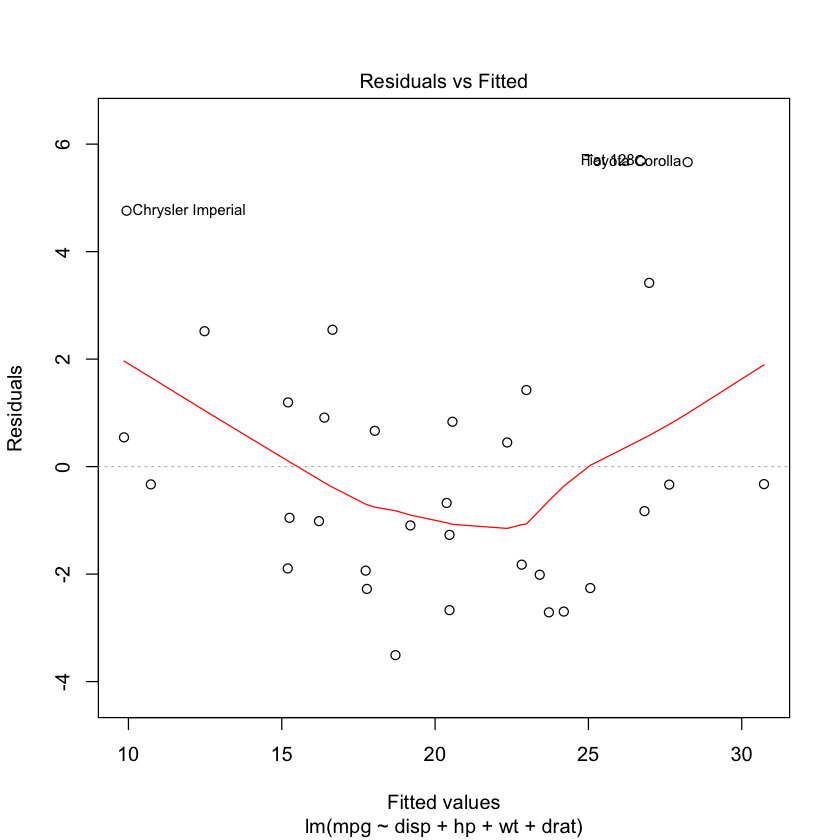

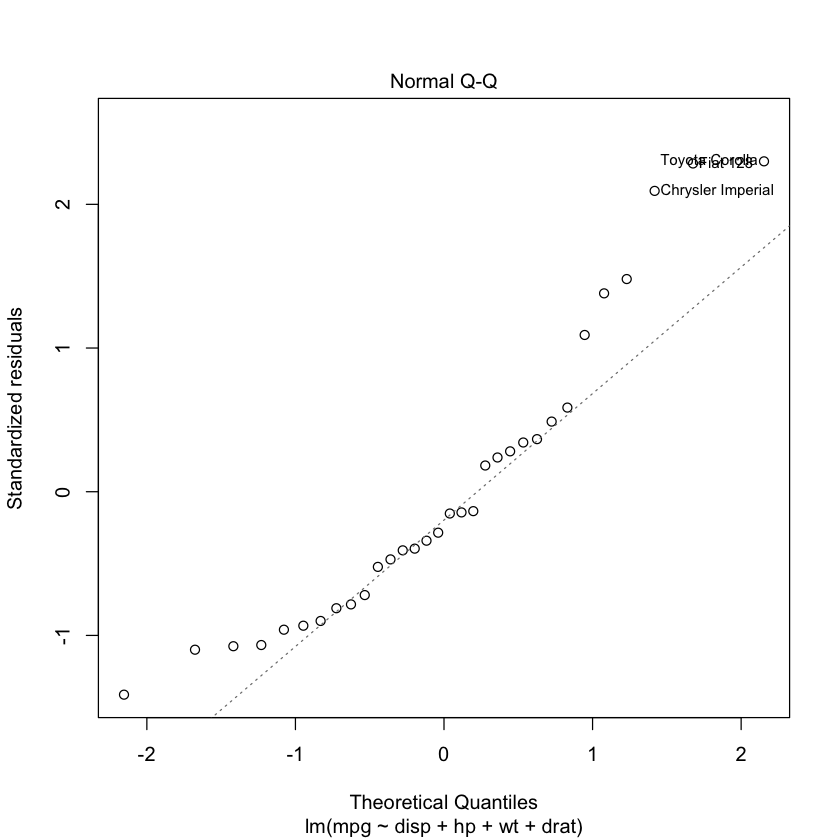

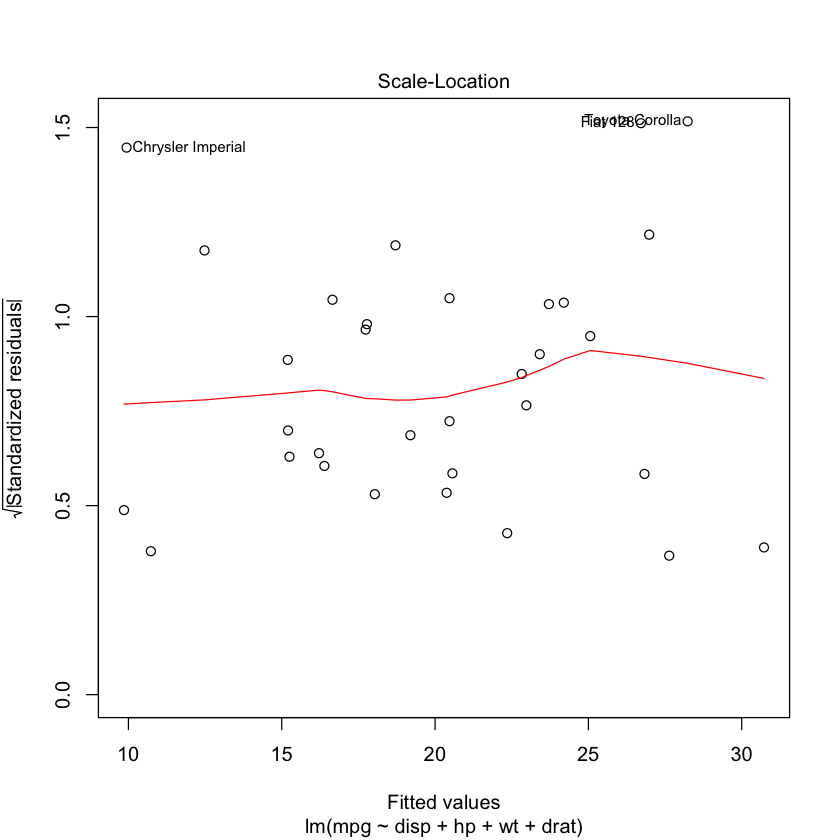

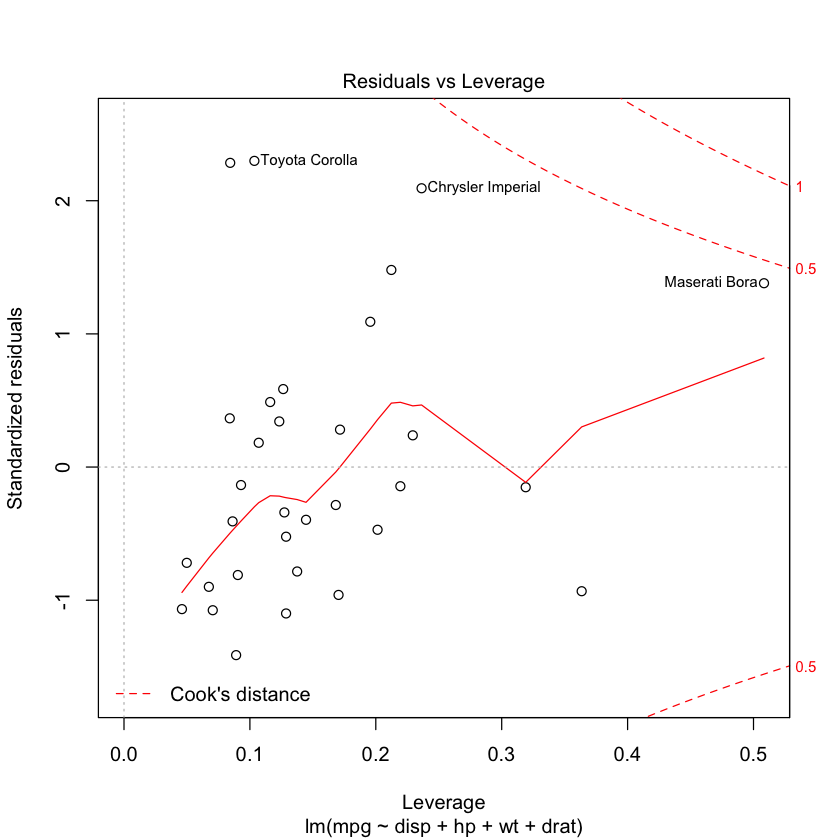

In [6]:
plot(model)

** 3.3 ** In addition to the above, assess to what extent (imperfect) multicollinearity is affecting your inference.

** 3.4 ** Interpret your slope coefficients, and note which ones are significantly different from zero.  Whether or not you detected heteroskedasticity above, be conservative in this step and use robust standard errors.

**3.5** How does the log transform affect which CLM assumptions hold.

** 3.6 ** Which model has a better fit.

** 3.7 ** (As time allows) Report the results of both models in a nicely formatted regression table.

<h3> 4 More about Multicollinearity </h3>

A common problem with multivariate regression is collinearity.
If two or more predictor variables are highly correlated, and they are both entered into a regression model, it increases the standard error of each one and you get very unstable estimates of the slope. We usually assess the collinearity by variance inflation factor (VIF). 

 <h4> 4.1 Ways to Detect Multicollinearity </h4>

We begin by regressing a particular independent variable on all other independent variables.

1.) As the squared correlation (r2) increases toward 1.0, the magnitude of potential problems associated with multicollinearity increases correspondingly. 


2.) Tolerance (1-R2) One minus the squared multiple correlation of a given IV from other Ivs in the equation. Tolerance values of 0.10 or less Indicate that there may be serious multicollinearity. 


3.) The Variance Inflation Factor [VIF=1/(1-R2)] VIF Is the reciprocal of the Tolerance. Any VIF of 10 or more provides evidence of serious multicollinearity. 


4.) Condition Number (k) The square root of the ratio of the largest eigenvalue to the smallest eigenvalue. k of 30 or larger indicate that there may be serious multicollinearity.